# Load data and pre-process

In [1]:
import numpy as np
import cv2
import os

In [6]:


train_path = "data/Training Data/Training Data"
test_path = "data/Testing Data/Testing Data"
val_path = "data/Validation Data/Validation Data"





In [3]:
# animal_folders

['Beetle',
 'Butterfly',
 'Cat',
 'Cow',
 'Dog',
 'Elephant',
 'Gorilla',
 'Hippo',
 'Lizard',
 'Monkey',
 'Mouse',
 'Panda',
 'Spider',
 'Tiger',
 'Zebra']

In [4]:
# for animal_type in animal_folders:
#     animal_folder_path = os.path.join(data_path, animal_type)
#     print(f"Loading images of {animal_type}...")

#     image_files = os.listdir(animal_folder_path)

#     for image_file in image_files:
#         if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
#             image_path = os.path.join(animal_folder_path, image_file)
            
#             try:
#                 img = cv2.imread(image_path)
#                 if img is None:
#                     print(f"Couldn't read image: {image_path}")
#                     continue

#                 # images to(200x200 pixels)
#                 img = cv2.resize(img, (200, 200))
#                 images.append(img)
#                 labels.append(animal_type)
                
#             except Exception as e:
#                 print(f"Error processing {image_path}: {str(e)}")


Loading images of Beetle...
Loading images of Butterfly...
Loading images of Cat...
Loading images of Cow...
Loading images of Dog...
Loading images of Elephant...
Loading images of Gorilla...
Loading images of Hippo...
Loading images of Lizard...
Loading images of Monkey...
Loading images of Mouse...
Loading images of Panda...
Loading images of Spider...
Loading images of Tiger...
Loading images of Zebra...


In [5]:
# images = np.array(images)
# labels = np.array(labels)

In [6]:
# # Let's see what our data looks like
# print("Dataset Information:")
# print(f"Number of images: {len(images)}")
# print(f"Image shape: {images[0].shape}")
# print("\nNumber of images per animal:")
# for animal in set(labels):
#     count = len(labels[labels == animal])
#     print(f"{animal}: {count} images")


Dataset Information:
Number of images: 30000
Image shape: (200, 200, 3)

Number of images per animal:
Beetle: 2000 images
Gorilla: 2000 images
Mouse: 2000 images
Cat: 2000 images
Lizard: 2000 images
Monkey: 2000 images
Cow: 2000 images
Panda: 2000 images
Spider: 2000 images
Tiger: 2000 images
Elephant: 2000 images
Zebra: 2000 images
Butterfly: 2000 images
Hippo: 2000 images
Dog: 2000 images


In [8]:
def load_data(data_path):
    images = []
    labels = []
    

    animal_folders = os.listdir(data_path)
    
    print(f"\nProcessing images from: {data_path}")
    for animal_type in animal_folders:
        animal_folder_path = os.path.join(data_path, animal_type)
        

            
        print(f"Loading images of {animal_type}...")
        image_files = os.listdir(animal_folder_path)
        
        for image_file in image_files:
            if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(animal_folder_path, image_file)
                
                try:
                    
                    img = cv2.imread(image_path)
                    if img is None:
                        continue
                    
                    # Resize to 200x200 pixels
                    img = cv2.resize(img, (200, 200))
                    images.append(img)
                    labels.append(animal_type)
                    
                except Exception as e:
                    print(f"Error processing {image_path}: {str(e)}")
    
    return np.array(images), np.array(labels)


In [9]:
train_images, train_labels = load_data(train_path)


val_images, val_labels = load_data(val_path)




Processing images from: data/Training Data/Training Data
Loading images of Beetle...
Loading images of Butterfly...
Loading images of Cat...
Loading images of Cow...
Loading images of Dog...
Loading images of Elephant...
Loading images of Gorilla...
Loading images of Hippo...
Loading images of Lizard...
Loading images of Monkey...
Loading images of Mouse...
Loading images of Panda...
Loading images of Spider...
Loading images of Tiger...
Loading images of Zebra...

Processing images from: data/Validation Data/Validation Data
Loading images of Beetle...
Loading images of Butterfly...
Loading images of Cat...
Loading images of Cow...
Loading images of Dog...
Loading images of Elephant...
Loading images of Gorilla...
Loading images of Hippo...
Loading images of Lizard...
Loading images of Monkey...
Loading images of Mouse...
Loading images of Panda...
Loading images of Spider...
Loading images of Tiger...
Loading images of Zebra...


In [11]:
len(train_images)

30000

In [10]:
test_images, test_labels = load_data(test_path)


Processing images from: data/Testing Data/Testing Data
Loading images of Beetle...
Loading images of Butterfly...
Loading images of Cat...
Loading images of Cow...
Loading images of Dog...
Loading images of Elephant...
Loading images of Gorilla...
Loading images of Hippo...
Loading images of Lizard...
Loading images of Monkey...
Loading images of Mouse...
Loading images of Panda...
Loading images of Spider...
Loading images of Tiger...
Loading images of Zebra...


#  features

In [2]:
from skimage.feature import hog, local_binary_pattern
from scipy.stats import skew, kurtosis

In [2]:
def extract_features(image):
    
    features = []
    
    # different color
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # HOG Features
    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=False)
    features.extend(hog_features)
    
    # LBP Features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=n_points + 2, range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-7)
    features.extend(lbp_hist)
    
    # Color Moments
    for color_space in [image, hsv]:
        for channel in range(3):
            channel_data = color_space[:, :, channel].flatten()
            
            # Mean and Std
            features.append(np.mean(channel_data))
            features.append(np.std(channel_data))
            
            # Skewness and Kurtosis
            features.append(skew(channel_data))
            features.append(kurtosis(channel_data))
    
    # Color Correlogram
    for channel in range(3):
        
        channel_data = image[:, :, channel]
        shifted_right = np.roll(channel_data, 1, axis=1)
        shifted_down = np.roll(channel_data, 1, axis=0)
        correlation_horizontal = np.mean(channel_data[:, :-1] == shifted_right[:, :-1])
        correlation_vertical = np.mean(channel_data[:-1, :] == shifted_down[:-1, :])
        features.extend([correlation_horizontal, correlation_vertical])
    
    # Haralick Texture
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    for distance in distances:
        glcm = np.zeros((16, 16))
        gray_scaled = (gray / 16).astype(int)
        for i in range(gray_scaled.shape[0]):
            for j in range(gray_scaled.shape[1]-distance):
                glcm[gray_scaled[i, j], gray_scaled[i, j+distance]] += 1
        
        glcm_norm = glcm / (glcm.sum() + 1e-7)
        features.append(np.sum(np.square(np.arange(16) - np.arange(16).reshape(-1, 1)) * glcm_norm))
        features.append(np.sum(glcm_norm / (1 + np.square(np.arange(16) - np.arange(16).reshape(-1, 1)))))
        features.append(np.sum(np.square(glcm_norm)))
    
    return np.array(features)




In [6]:
def extract_dataset_features(images, dataset_name):
    features = []
    print(f"\nExtracting features for {dataset_name} dataset...")
    
    for idx, img in enumerate(images):
        if idx % 100 == 0:
            print(f"Processing image {idx}/{len(images)}")
        feature_vector = extract_features(img)
        features.append(feature_vector)
    
    return np.array(features)

In [14]:


# Extract features for all datasets
train_features = extract_dataset_features(train_images, "training")
val_features = extract_dataset_features(val_images, "validation")
test_features = extract_dataset_features(test_images, "testing")

# Save features to avoid recomputing
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)
np.save('test_features.npy', test_features)

print("\nFeature extraction complete!")
print(f"Training features shape: {train_features.shape}")
print(f"Validation features shape: {val_features.shape}")
print(f"Testing features shape: {test_features.shape}")
print(f"Number of features per image: {train_features.shape[1]}")



Extracting features for training dataset...
Processing image 0/30000
Processing image 100/30000
Processing image 200/30000
Processing image 300/30000
Processing image 400/30000
Processing image 500/30000
Processing image 600/30000
Processing image 700/30000
Processing image 800/30000
Processing image 900/30000
Processing image 1000/30000
Processing image 1100/30000
Processing image 1200/30000
Processing image 1300/30000
Processing image 1400/30000
Processing image 1500/30000
Processing image 1600/30000
Processing image 1700/30000
Processing image 1800/30000
Processing image 1900/30000
Processing image 2000/30000
Processing image 2100/30000
Processing image 2200/30000
Processing image 2300/30000
Processing image 2400/30000
Processing image 2500/30000
Processing image 2600/30000
Processing image 2700/30000
Processing image 2800/30000
Processing image 2900/30000
Processing image 3000/30000
Processing image 3100/30000
Processing image 3200/30000
Processing image 3300/30000
Processing imag

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# text labels to numbers 
label_encoder = LabelEncoder()


In [11]:
train_labels_encoded = label_encoder.fit_transform(train_labels) #encoder on training lables, stablish the classes 

In [ ]:

val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# -Random Forest model

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=120,
    n_jobs=-1,
    random_state=42
)

In [21]:
rf_model.fit(train_features, train_labels_encoded)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
train_features = np.load('train_features.npy')
val_features = np.load('val_features.npy')
test_features = np.load('test_features.npy')

In [14]:
print("NaN Analysis:")
print(f"Total NaN values: {np.isnan(train_features).sum()}")
print("\nNaN values per feature:")
nan_counts = np.isnan(train_features).sum(axis=0)
feature_indices_with_nan = np.where(nan_counts > 0)[0]
for idx in feature_indices_with_nan:
    print(f"Feature {idx}: {nan_counts[idx]} NaN values")

NaN Analysis:
Total NaN values: 1984

NaN values per feature:
Feature 20776: 496 NaN values
Feature 20777: 496 NaN values
Feature 20780: 496 NaN values
Feature 20781: 496 NaN values


In [15]:
train_features = np.nan_to_num(train_features, nan=0.0)
val_features = np.nan_to_num(val_features, nan=0.0)
test_features = np.nan_to_num(test_features, nan=0.0)

print("\nAfter fixing:")
print(f"Total NaN values: {np.isnan(train_features).sum()}")


After fixing:
Total NaN values: 0


In [19]:
rf_model.fit(train_features, train_labels_encoded)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=42)

# -predictions on validation set

In [20]:

val_predictions = rf_model.predict(val_features)
val_accuracy = accuracy_score(val_labels_encoded, val_predictions)
print(f"\nValidation Accuracy: {val_accuracy*100:.2f}%")


Validation Accuracy: 45.80%


In [ ]:




test_predictions = rf_model.predict(test_features)
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")




print("\nValidation Set Classification Report:")
print(classification_report(
    val_labels_encoded,
    val_predictions,
    target_names=label_encoder.classes_
))


print("\nTest Set Classification Report:")
print(classification_report(
    test_labels_encoded,
    test_predictions,
    target_names=label_encoder.classes_
))


Test Accuracy: 37.89%

Validation Set Classification Report:
              precision    recall  f1-score   support

      Beetle       0.59      0.38      0.46       200
   Butterfly       0.41      0.56      0.47       200
         Cat       0.37      0.77      0.50       100
         Cow       0.23      0.19      0.21       100
         Dog       0.51      0.36      0.42       100
    Elephant       0.50      0.62      0.55       100
     Gorilla       0.44      0.75      0.56       100
       Hippo       0.39      0.64      0.49       100
      Lizard       0.49      0.38      0.43       200
      Monkey       0.21      0.14      0.17       100
       Mouse       0.62      0.44      0.52       200
       Panda       0.58      0.41      0.48       100
      Spider       0.68      0.49      0.57       200
       Tiger       0.35      0.49      0.40       100
       Zebra       0.45      0.29      0.35       100

    accuracy                           0.46      2000
   macro avg       

# - As the accuracy is too low... moving wioth alternates options...

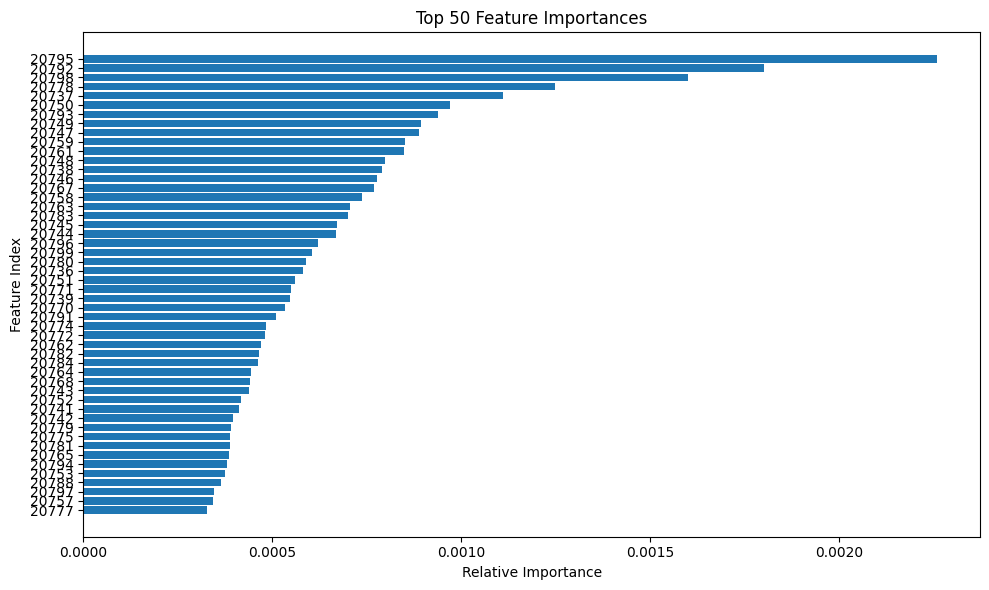

In [24]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-50:]  # Top 50 features

plt.figure(figsize=(10, 6))
plt.title("Top 50 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.xlabel("Relative Importance")
plt.ylabel("Feature Index")
plt.yticks(range(len(indices)), indices)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Removing low variance featuras
selector = VarianceThreshold(threshold=0.01)
train_var = selector.fit_transform(train_features)
val_var = selector.transform(val_features)
test_var = selector.transform(test_features)

In [19]:
train_var.shape

(30000, 13467)

In [20]:
# reducing to top 300 components
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_var)
val_scaled = scaler.transform(val_var)
test_scaled = scaler.transform(test_var)

In [21]:
pca = PCA(n_components=300, random_state=42)
train_pca = pca.fit_transform(train_scaled)
val_pca = pca.transform(val_scaled)
test_pca = pca.transform(test_scaled)

In [22]:
train_pca.shape

(30000, 300)

In [23]:
from sklearn.svm import SVC



svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_model.fit(train_pca, train_labels_encoded)



SVC(C=10, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

val_preds = svm_model.predict(val_pca)
val_acc = accuracy_score(val_labels_encoded, val_preds)
print(f"🎯 Validation Accuracy: {val_acc*100:.2f}%")


🎯 Validation Accuracy: 56.35%


In [ ]:
import joblib

joblib.dump(svm_model, f'svm_pca_model_{val_acc*100:.2f}.pkl')

['svm_pca_model_56.35.pkl']

In [ ]:
import joblib

svm_model = joblib.load(f'svm_pca_model_{val_acc*100:.2f}.pkl')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



In [30]:
param_grid = {
    'C': [1, 10, 50],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(probability=True),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid.fit(train_pca, train_labels_encoded)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 50], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_ * 100)


val_preds = grid.best_estimator_.predict(val_pca)
from sklearn.metrics import accuracy_score
print("Validation Accuracy:", accuracy_score(val_labels_encoded, val_preds) * 100)


Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 47.936666666666675
Validation Accuracy: 56.35


In [ ]:

joblib.dump(svm_model, 'final_svm_model.pkl')

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [54]:
joblib.dump(selector, 'selector.pkl')

['selector.pkl']

<h1>MOdel is trained and even the hyper parameters were also tuned beleving it would increase the model accuracy... 
and after all these i have this SVM model as a final model.

# Inference

In [ ]:


scaler = joblib.load("./model/scaler.pkl")
pca = joblib.load("./model/pca.pkl")
svm_model = joblib.load("./model/final_svm_model.pkl")
label_encoder = joblib.load("./model/label_encoder.pkl")
selector = joblib.load("./model/selector.pkl")



def predict_animal_species(image_path):
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (200, 200))

    features = extract_features(image)
    features = np.nan_to_num(features)

    features_selected = selector.transform([features]) 

    features_scaled = scaler.transform(features_selected)

    features_pca = pca.transform(features_scaled)

    pred_encoded = svm_model.predict(features_pca)[0]
    return label_encoder.inverse_transform([pred_encoded])[0]


In [18]:
res = predict_animal_species("image.png")

In [19]:
res

'Elephant'